<a href="https://colab.research.google.com/github/sanmeshh/Synapse_LP/blob/week4/Synapse_LP_Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 4**

## **DJS Synapse Learning Period**
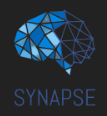

Congratulations on making it this far!! Welcome to the world of classification where we move on from unsupervised to helping the algorithms by telling them exactly what the data we're feeding them is. This week we'll be looking into  many algorithms such as Decision Trees, SVC, Naive Bayes, Random Forest and so on. We'll also be delving into hyperparameter tuning the only place where ched chaad can lead to a good result.

**Warning: This task contains many theory questions. Proceed with caution!**

Jk, make sure you research well and make sure you are understanding the models y'all are implementing as that will make your concepts much stronger and build a strong ML foundation which will be very useful as we move further with the tasks.

### Overfitting and Underfitting [VERY IMPORTANT]:
https://www.youtube.com/watch?v=T9NtOa-IITo
Note : This concept can be seen in K Means and decision trees. In fact, we will look deeper into
this when we begin deep learning.

## Importing the dataset

Use this link to download the adult income dataset and upload it to your drive.

https://drive.google.com/file/d/1VAE1qF16D-sKnBOWXzGXVNGhtNZNLFQS/view?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt

Mounted at /content/drive


In [ ]:
#import your dataset here
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/adult_income_dataset.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Dealing with Nan values

In [ ]:
#write a code to find the nan values for the dataset and make a decision on whether to dropna or fill na
# df.isna().sum()
df.dropna(inplace=True)

## Object Valued Columns

For Relationship, Race and Sex find out the max division average fnlwgt for each unique value.

In [ ]:
#Write your code here
df['marital-status'].unique()


array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

## Getting rid of unnecessary columns

*   Drop the education num column since we already have their education in the form of categories
*   Check the combinations of the marital-status and relationship column, see if we need both of them or just marital status will work too.


In [ ]:
#write your code here
df.drop(columns=['education-num'],inplace=True)


## Dealing with Categorical Data
As you probably know by now, the ML models dont know how to deal with String or object type data... so your mission shall you choose to accept it (don't really have much of a choice) is to find out which columns to do one hot encoding on and which columns to do Label Encoding on.

**Hint: Since Marital-status has less number of columns, One Hot encode it**

In [ ]:
#Write your code here
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

df['race']=label.fit_transform(df['race'])
df['sex']=label.fit_transform(df['sex'])


df=pd.get_dummies(df,columns=['marital-status','workclass','education','occupation','relationship','native-country'],dtype='int')



## Altering the Target Column
Modify the Target Column (income) to make sure that all the values which are <=50K are replaced with a 0 and the values >50K are replaced with a 1.

In [ ]:
#write your code here
df['income']=df['income'].apply(lambda x: 0 if x=='<=50K' else 1)

**Extract the target column(income) and store it in a seperate variable and remove it from the original dataset. Additionally, do a 70:30 Train Test Split**

In [ ]:
#write your code here
y=df['income']
df.drop(columns=['income'],inplace=True)
X=df.iloc[:,:]
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


### Chalo now that we have the preprocessed data we can feed it into the models. Lets start with some basic ones.

# Logistic Regression
*   Theory:https://www.youtube.com/watch?v=yIYKR4sgzI8&list=PLblh5JKOoLUKxzEP5HA2d-Li7IJkHfXSe
*   Implementation: https://www.youtube.com/watch?v=n40hS9tQmcY


Explain the algorithm, its working and its use cases.

In Logistic regression features are taken as input and the probabilties of those features being of a particular class are given. It uses sigmoid function which converts a X value to a value between 0 to 1.A thereshold is set for example 0.5 below 0.5 the algorithm predicts as 0 and above that predicts as 1.

Use Cases: email spam detection: The algorithm is feeded data such as the body of an email or the name of the sender and on basis of that it predicts whether the email is a spam or not.

Breast Cancer Detection:Also used for medicinal purposes where the size of the tumour and various other features are given to predict whether the tumor is malignant or not.

In [ ]:
#import the model and apply it to the data
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)


Find the accuracy and confusion matrix for the same and explain what it shows.

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))



0.7855011603492098
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      6767
           1       0.71      0.25      0.37      2282

    accuracy                           0.79      9049
   macro avg       0.75      0.61      0.62      9049
weighted avg       0.77      0.79      0.74      9049



# Naive Bayes Algorithm

* Theory : https://youtu.be/jS1CKhALUBQ
* Theory:
https://www.analyticsvidhya.com/blog/2021/09/naive-bayes-algorithm-a-complete-guide-for-data-science-enthusiasts/
* Implementation : https://youtu.be/nHIUYwN-5rM

In [ ]:
#import the model from sklearn and apply it to your data
from sklearn.naive_bayes import MultinomialNB

bayes=MultinomialNB()
bayes.fit(X_train,y_train)

y_pred=bayes.predict(X_test)

print(accuracy_score(y_test,y_pred))




0.7717979887280363


# Decision Tree Classifier
* Theory : https://youtu.be/7VeUPuFGJHk
* Theory: https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/
* Implementation : https://youtu.be/HY2DcBhgwm0

In [ ]:
#import the decision tree from sklearn and run it on your data
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier()

tree.fit(X_train,y_train)
y_pred=tree.predict(X_test)





<b>Print the Model Accuracy</b>

In [ ]:
print(accuracy_score(y_pred,y_test))

0.8193170516079125


## Explain: What are the differences in the working of Logistic Regression, Naive Bayes and Decision Tree and explain why are the accuracies are different.

Ans:All the three use probablities to predict output. But the way the use it and the concepts they use are different.

Logistic Regression: This technique uses sigmoid function (gives output between 0 to 1) and on the basis of the output of this function it predicts output.

Naive Bayes: This technique divides all the features according to their truth label,computes the probability of all the features individually and then predicts the output on the basis of probabilities computed by using the bayes theorem.

Decision Tree: The base of this concept is similar to nested if else condition. But it does involve lot of details in it to reach to particular outpug. Decision tree algorithms include ID3, C4.5, CART, and Random Forest.

Due to all the differences in these techniques the accuracies are different.

### Mention some real life use cases for each of these three models:

Ans:

Logistic Regression:Spam detection,Tumor detection

Naive Bayes:Sentiment analysis,also Spam detection

Decision Trees:Fitness Prediction,Customer Purchases

Now that you have your first result, make sure that you play with the hyperparameters to get a better result. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

In [ ]:
#plot a graph that shows the train and test accuracy for increasing depth of the tree (do for 10)
training=[]
test=[]
for depth in range(1,11):
  dt_model=DecisionTreeClassifier(max_depth=depth,random_state=10)
  dt_model.fit(X_train,y_train)
  training.append(dt_model.score(X_train,y_train))
  test.append(dt_model.score(X_test,y_test))





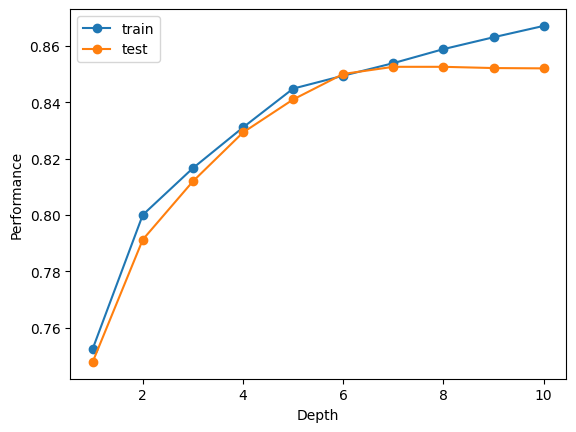

In [ ]:
df=pd.DataFrame({'depth':range(1,11), 'train_accuracy':training, 'test_accuracy':test})

plt.plot(df['depth'],df['train_accuracy'],marker='o')
plt.plot(df['depth'],df['test_accuracy'],marker='o')
plt.xlabel('Depth')
plt.ylabel('Performance')
plt.legend(['train','test'])
plt.show()

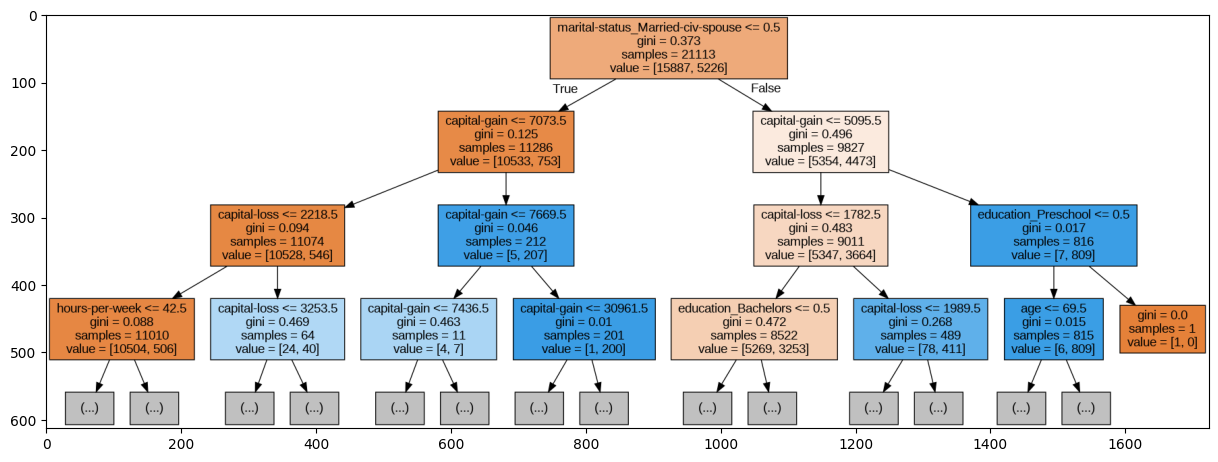

In [ ]:
#complete the code below to create an image of the decision tree
from sklearn import tree
!pip install graphviz
decision_tree = tree.export_graphviz(dt_model, out_file='tree.dot', feature_names=X_train.columns, max_depth=3, filled=True)
!dot -Tpng tree.dot -o tree.png # to convert the file
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

<b>print the test accuracy and train accuracy here</b>

In [ ]:
#write code here



<function accuracy_score at 0x79700c93df30>


### Explain the different hyperparameters you changed and how did it affect the models. Also give a summary of the graphs you made.

Ans:
The parameters I changed was depth of the decision tree , this improved the accuracy of the model as more and more classifications were made leading to better results.

1. First graph was an easy graph where I plot was about depth vs accuracy which included two accuracies , training accuracy and test accuracy which showed how the model performed on the training data and the test data when the depth was increasing.

2. Second graph was the visualization of a decision tree.where the depth of the tree was set , helped me to gain insight on how the tree is actually working.

## Optimizing Methods

We can even use Ensemble Methods like **bagging (random forest)**, **boosting (adaboost)** and **Pruning** to improve your accuracy. Again creating a loop of hyperparameters and then finding the best among them is a daunting task. To reduce the efforts, we can use a special technique known as **GridSearchCV**. It finds the best hyperparameters for your model without you having to write multiple loops and evaluating them.

1. GridSearchCV for Random Forest Classifier: https://youtu.be/c4mS7KaOIGY
2. GridSearchCV for Adaboost Classifier: https://youtu.be/JmXnztjULnQ

### 1. Bagging

* Theory : https://www.youtube.com/watch?v=KIOeZ5cFZ50
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* Implementation : https://www.youtube.com/watch?v=MxiktOPmhV8&t=2s

In [ ]:
#implement Random forest


In [ ]:
#find the accuracy



### Explain the difference between random forest and decision tree. Also think of cases where the outputs for both of them can be same if its possible.

Ans:

In [ ]:
#write a code to implement BaggingClassifier

### Explain how are Bagging and Random Forest different and why do we do bagging?


Ans:

### 2. Boosting

* Theory : https://www.youtube.com/watch?v=NLRO1-jp5F8&t=724s
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
*   Theory:https://www.geeksforgeeks.org/ml-xgboost-extreme-gradient-boosting/
* Implementation : https://www.youtube.com/watch?v=7xHM93WXOu8

In [ ]:
#write code here

Just to make things more interesting implement XGBoost as well and compare its accuracy with that of AdaBoost :)

### Explain: What is the difference between Adaboost and XGBoost. Also describe in what cases is XGBoost better to use than AdaBoost.

Ans:

## Explain: What is the difference between Bagging and Boosting? Explain with examples

Ans:

### 3. Pruning Techniques



*   Theory: https://opendatascience.com/what-is-pruning-in-machine-learning/
*   Theory:https://towardsdatascience.com/build-better-decision-trees-with-pruning-8f467e73b107



In [ ]:
#implement pruning

In [ ]:
#plot a tree (image) similar to one created for decision tree (graphwiz) for the pruning technique

In [ ]:
#write your code here

<b>Note that the accuracy on the test set will be considered and brownie points for *not* overfitting the model in the process</b>

As a brush up on data visualisation... make a graph to compare the accuracies you achieved for each of the models you trained and explain which one is the best to perform classification tasks and why?

In [ ]:
#write your code here

# **Bonus: To be done only if you have completed the above tasks.**

Ensemble Models are not only used for classification but also for Regression.Research on the various regression models such as XGBoost Regressor and Random Forest regressor and how are they different from the Linear Regression model we made in Task 2. The best research will be edited and featured on the Synapse Instagram page. Happy coding! :)

# **End of Task**

> ©DJS Synapse 2024 - 2025